In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.shape

(891, 3)

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [11]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [20]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([23.  , 60.  , 37.  , 20.  , 40.  , 42.  , 19.  , 25.  , 35.  ,
       50.  ,  0.83, 58.  , 19.  , 21.  ,  5.  , 36.  , 39.  , 35.  ,
       54.  , 16.  , 27.  , 24.  , 35.  , 45.  ,  3.  , 36.5 , 36.  ,
       33.  , 59.  , 19.  ,  4.  , 18.  , 42.  , 26.  , 42.  , 14.  ,
       30.  , 30.  , 30.  , 15.  ,  1.  , 56.  , 28.  , 34.  , 61.  ,
       34.  , 38.  , 19.  , 21.  , 24.  , 39.  , 17.  , 26.  , 64.  ,
       30.  , 36.  , 37.  ,  9.  ,  7.  ,  9.  , 30.  , 29.  , 16.  ,
       29.  , 24.  ,  4.  , 51.  , 20.  , 26.  , 16.  , 20.  , 19.  ,
       19.  , 18.  , 17.  ,  9.  , 40.  , 30.  , 22.  , 29.  ,  9.  ,
       46.  , 36.  , 34.  , 21.  ,  4.  , 40.  , 26.  , 36.  , 28.  ,
       47.  , 42.  ,  2.  ,  9.  , 65.  , 36.  , 22.  , 24.  , 35.  ,
       26.  , 36.  , 22.  , 49.  , 34.  ,  4.  , 18.  , 24.  , 23.  ,
       36.  , 37.  , 20.  ,  0.42, 48.  , 23.  , 22.  , 31.  , 22.  ,
       28.  , 33.  , 16.  , 32.  , 43.  , 26.  , 31.  , 45.5 , 23.  ,
       27.  , 50.  ,

In [21]:
X_train['Age'].isnull().sum()

148

In [22]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,70.0
493,71.0,49.5042,71.0
527,NaN,221.7792,24.0


C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_14308\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_14308\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

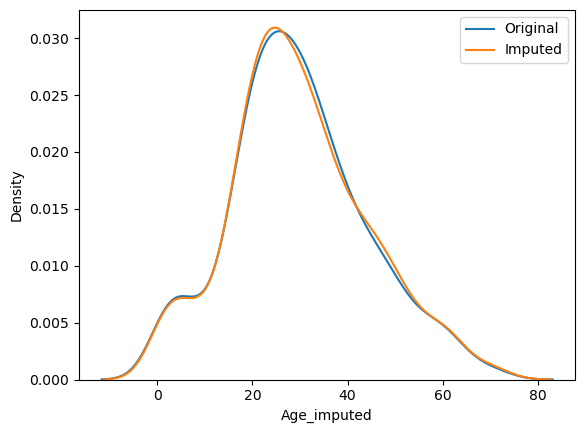

In [25]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [26]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  208.19618458078517


In [27]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,54.414426
Age,71.512440,204.349513,204.349513
Age_imputed,54.414426,204.349513,208.196185


<AxesSubplot: >

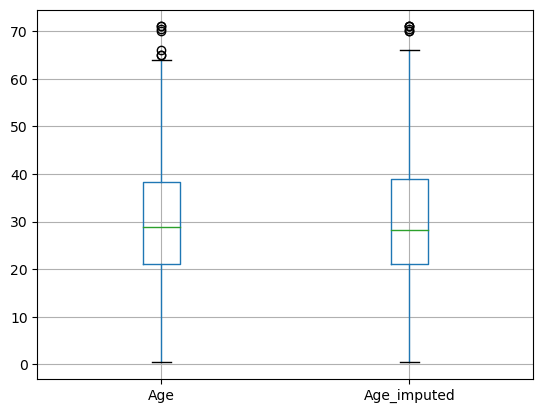

In [28]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [31]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.shape

(1460, 3)

In [30]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [32]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [40]:
X = data
y = data['SalePrice']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000
...,...,...,...
466,Po,TA,167000
299,Gd,TA,158500
493,Fa,TA,155000
527,Gd,TA,446261


In [42]:
X_test['GarageQual_imputed'] = X_test['GarageQual']
X_train['GarageQual_imputed'] = X_train['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [43]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1268,Gd,TA,381000,TA,Gd
969,NaN,TA,140000,TA,NaN
823,Gd,TA,139500,TA,Gd
491,TA,TA,133000,TA,TA
1370,NaN,TA,105000,TA,NaN


In [44]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_14308\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_14308\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_14308\856878696.py:4: Se

In [45]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [48]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [52]:
X_train['FireplaceQu'].value_counts()/ len(X_train['FireplaceQu'].dropna())

Gd    0.494272
TA    0.412439
Fa    0.040917
Po    0.027823
Ex    0.024550
Name: FireplaceQu, dtype: float64

In [49]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.648709
TA,0.412439,0.538721
Fa,0.040917,0.054994
Po,0.027823,0.037037
Ex,0.024550,0.031425


C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_14308\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_14308\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom

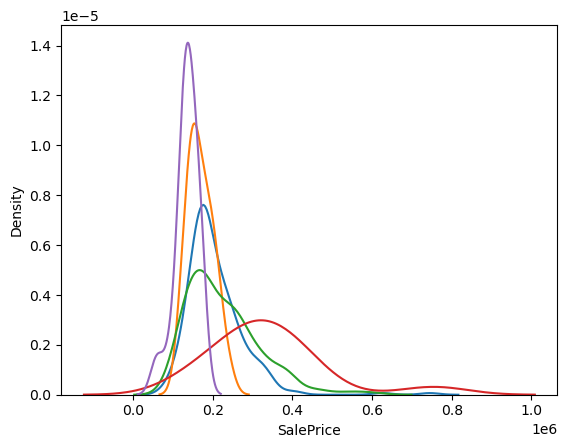

In [53]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_14308\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_14308\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/m

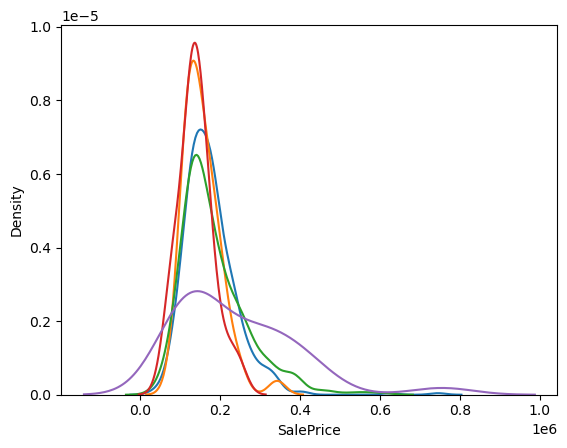

In [54]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()